## Bike Sharing Case Study

#### Problem Statement:

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from  sklearn.model_selection import train_test_split
# Instantiate the object
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv('day.csv')
df.head()

In [3]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

- Check for multicollinearity going on, this is the first place to catch it
- Predictors directly have a strong association with the outcome variable
 

### Data Preparation

In [8]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [9]:
df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [10]:
df=df.drop(['instant', 'dteday', 'casual','registered'], axis=1)

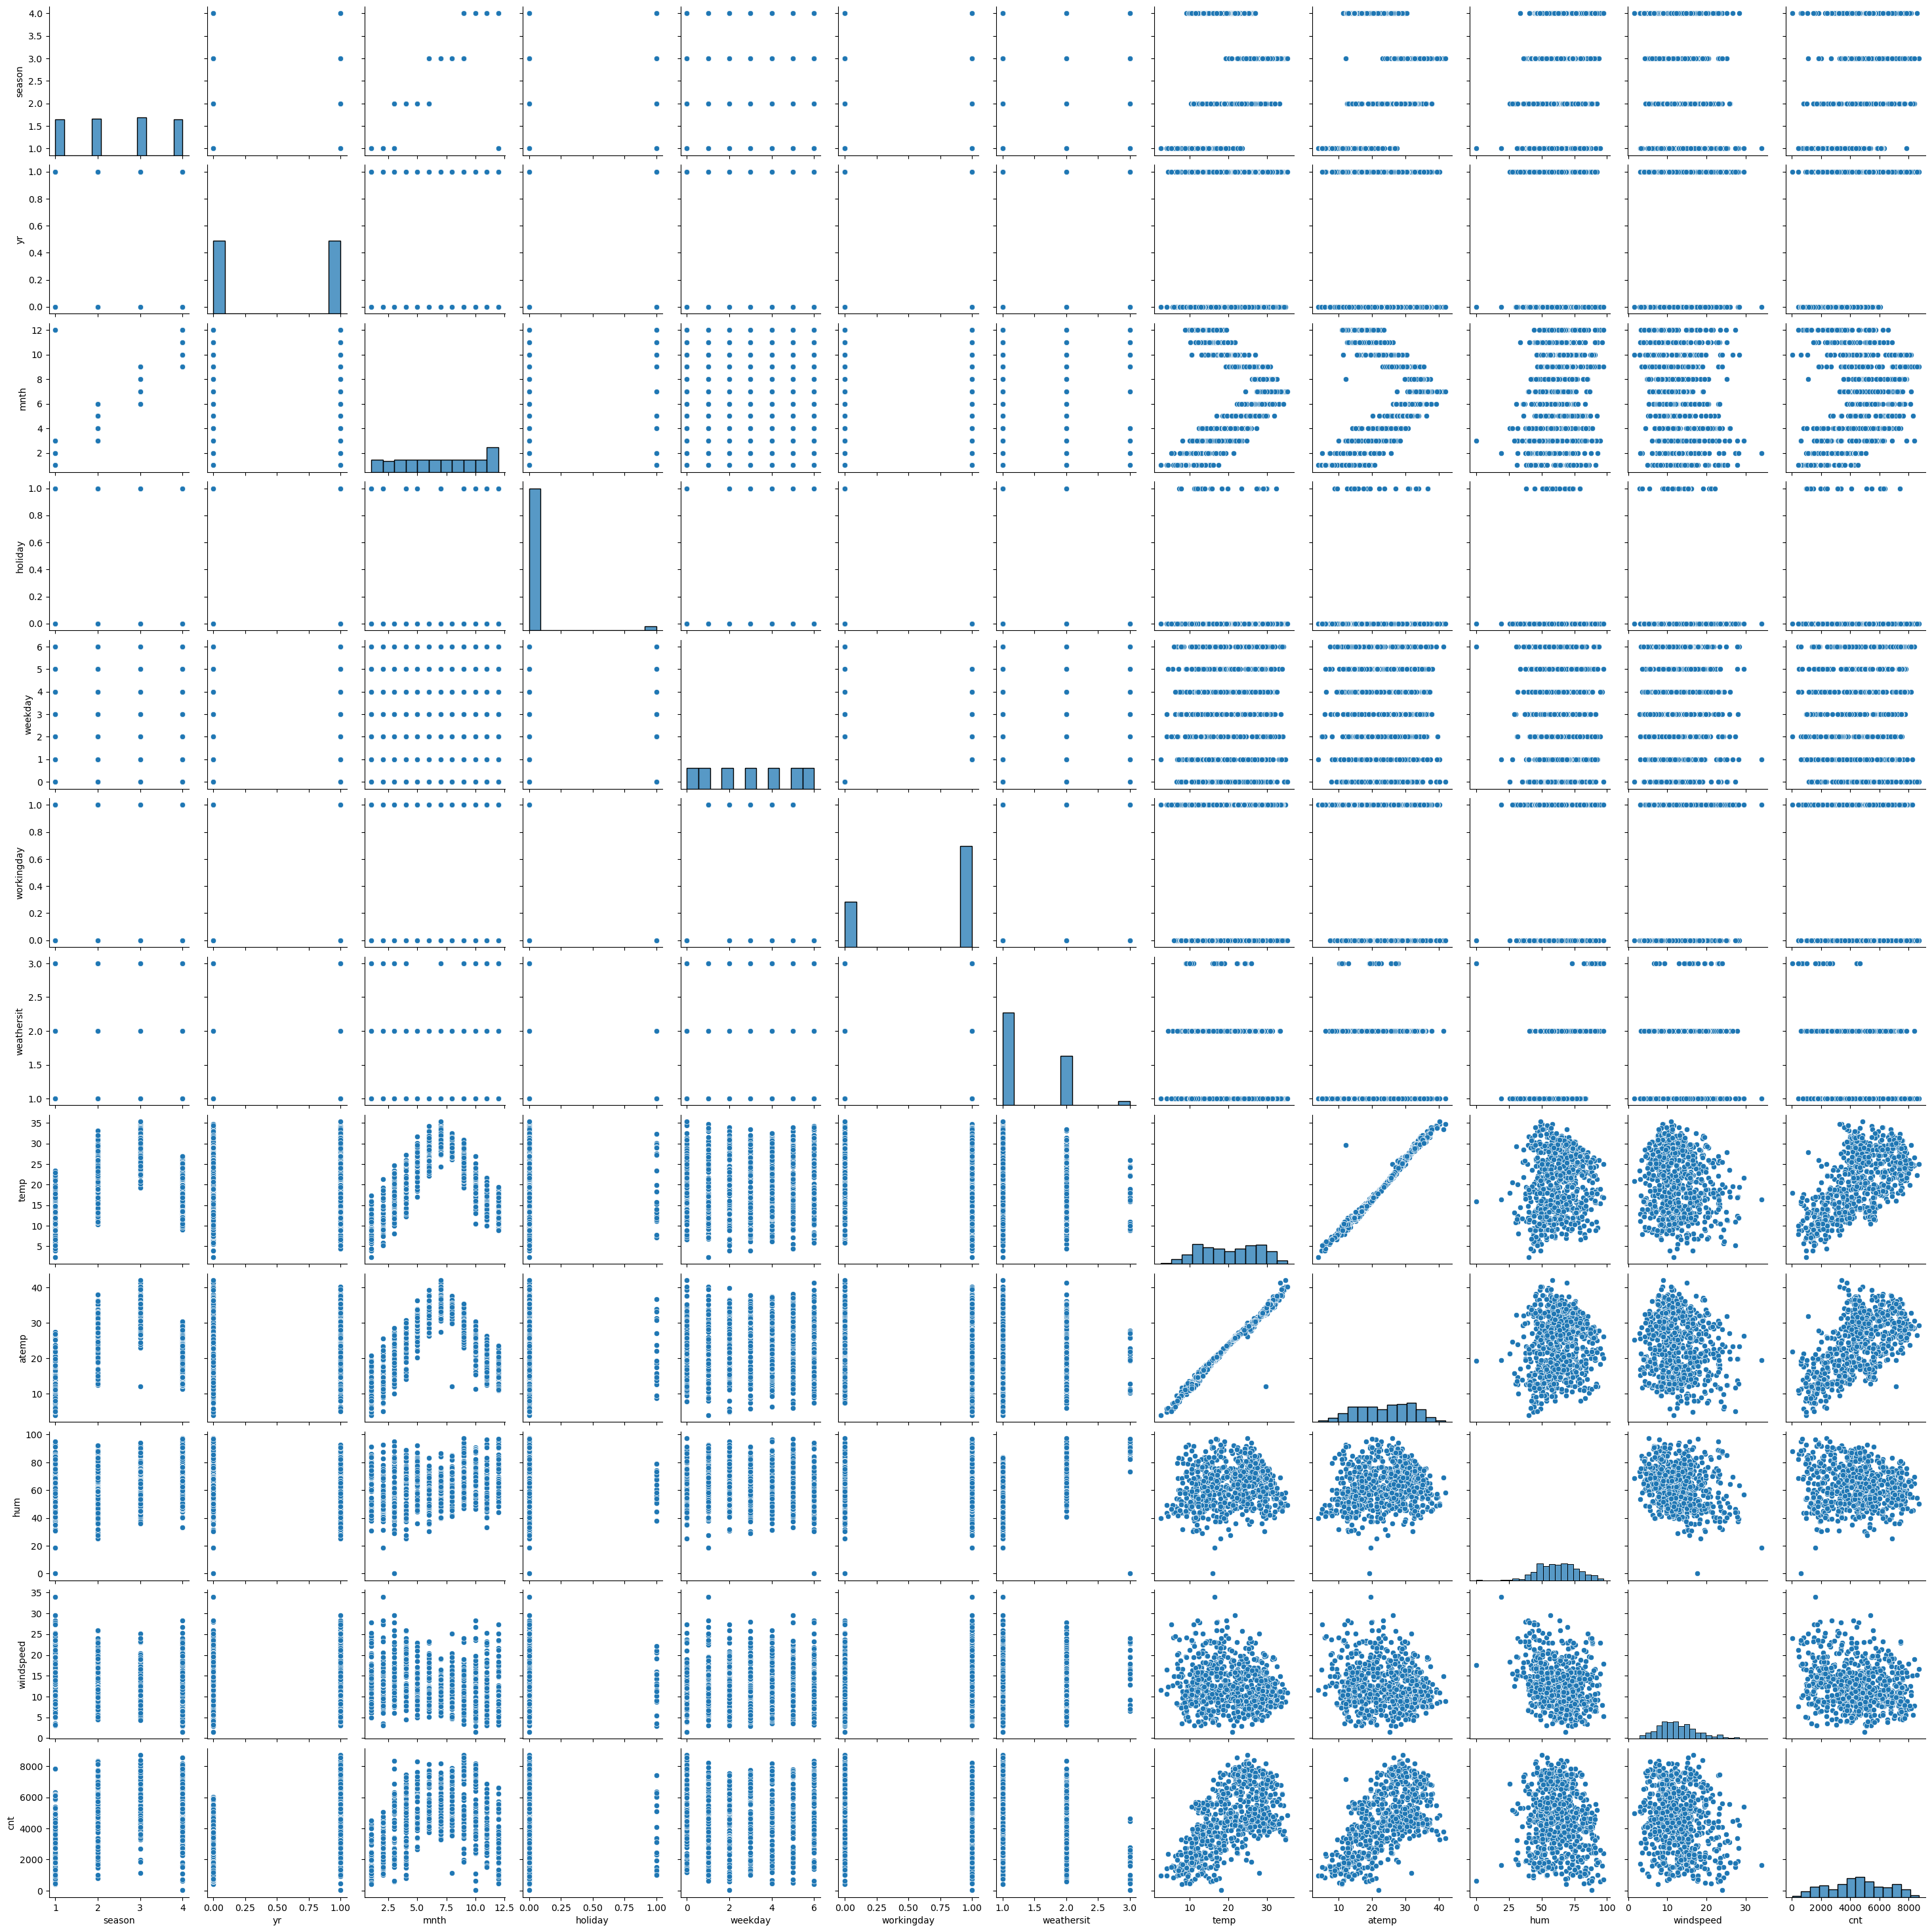

In [12]:
#Visualizing

sns.pairplot(df)
plt.show()

### Convert to Categorical Columns
 

In [14]:
df['season']= df.season.apply(lambda x : "spring" if x==1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))

In [15]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
df['weathersit']= df.weathersit.apply(lambda x : "Clear" if x==1 else ("Mist" if x==2 else ("Light Rain" if x==3 else "Heavy Rain")))

In [17]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light Rain     21
Name: weathersit, dtype: int64

use BoxPlot to check outlier

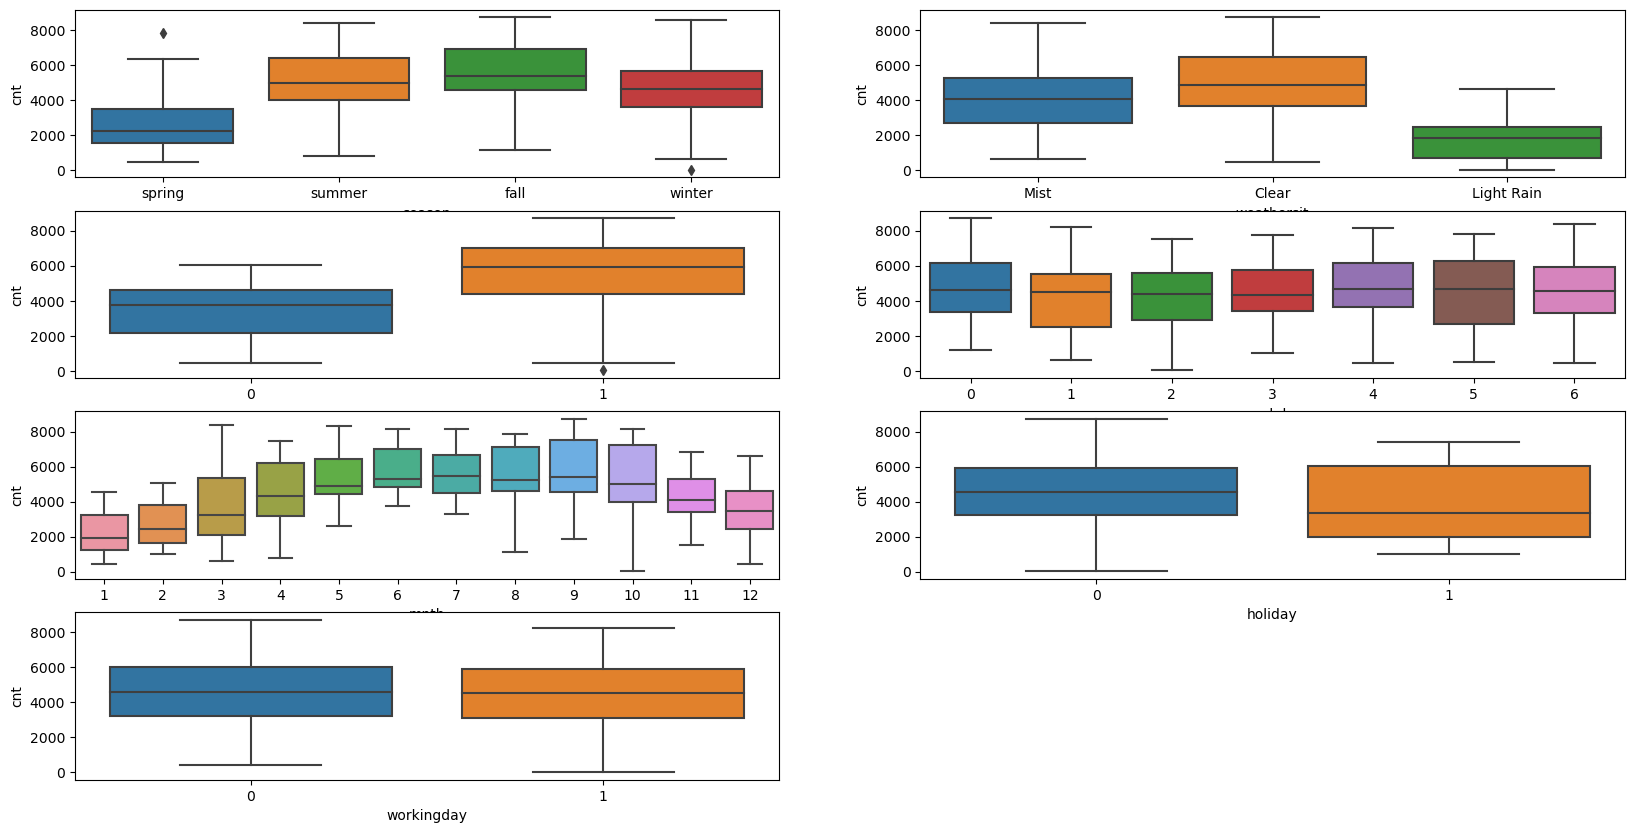

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(4,2,2)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(4,2,3)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(4,2,4)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(4,2,5)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(4,2,6)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(4,2,7)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.show()

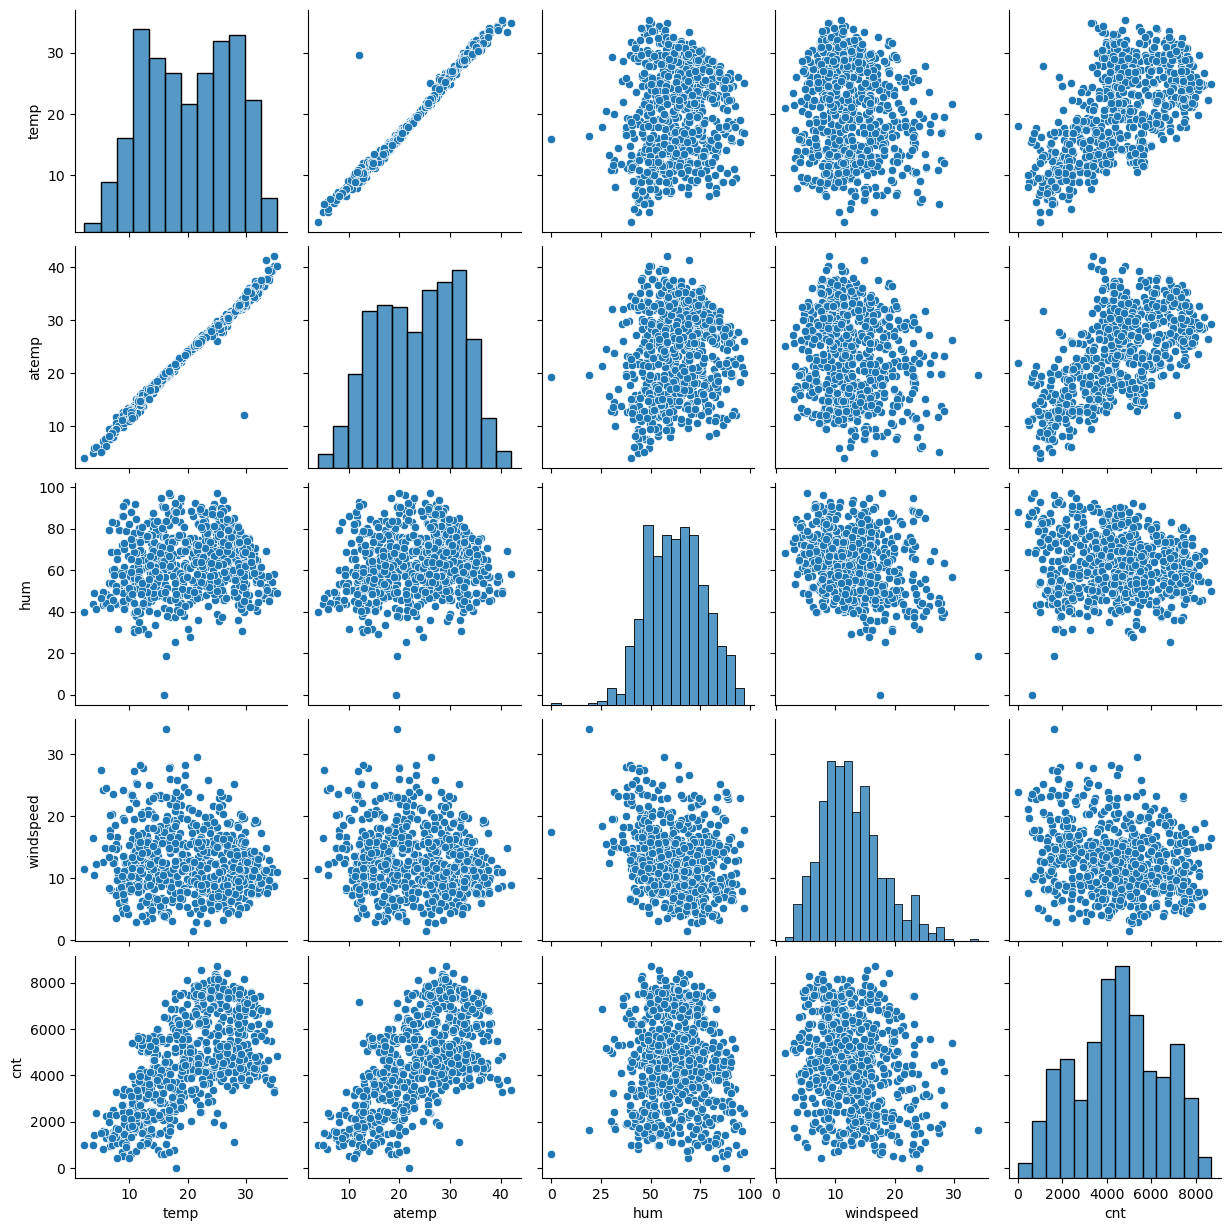

In [19]:
#Visualizing
num_var=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df[num_var])
plt.show()

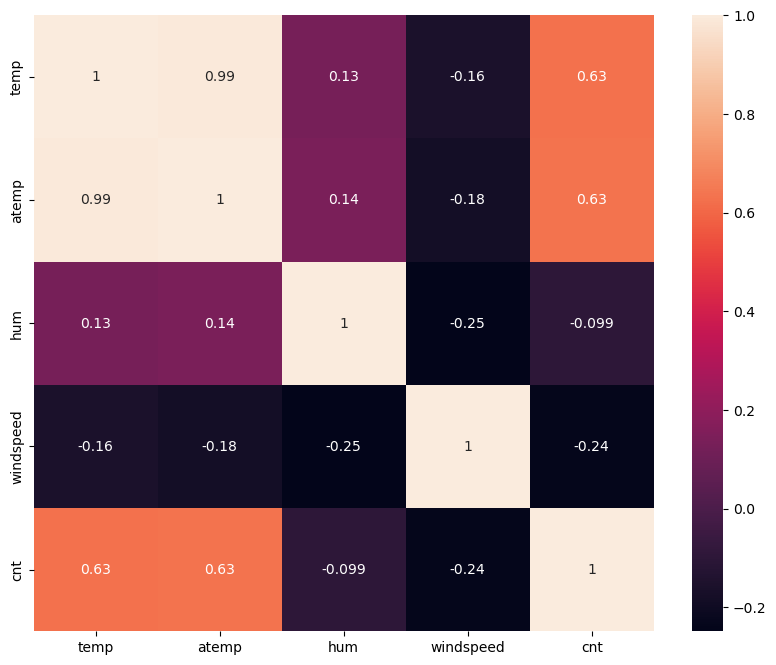

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_var].corr(), annot=True)
plt.show()

### create dummy variables

In [25]:
season_dummy= pd.get_dummies(df['season'], prefix='season_', drop_first=True)
season_dummy.head()

,season__spring,season__summer,season__winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
weathersit_dummy= pd.get_dummies(df['weathersit'], prefix="weathersit", drop_first=True)
weathersit_dummy.head()

,weathersit_Light Rain,weathersit_Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


HeavyRain (this is not present)

In [29]:
mnth_dummy= pd.get_dummies(df['mnth'], prefix='month_', drop_first=True)
mnth_dummy.head()

,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [30]:
weekday_dummy= pd.get_dummies(df['weekday'], prefix='weekday_', drop_first=True)
weekday_dummy.head()

,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [31]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
df= pd.concat([df, season_dummy, weathersit_dummy, mnth_dummy, weekday_dummy ], axis=1)
df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season__spring,season__summer,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


### Split into train and test

In [35]:
df_train, df_test= train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [36]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season__spring,season__summer,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the variables
- Minmax()
- Standarization

In [40]:
scaler= MinMaxScaler()

In [41]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season__spring', 'season__summer', 'season__winter',
       'weathersit_Light Rain', 'weathersit_Mist', 'month__2', 'month__3',
       'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9',
       'month__10', 'month__11', 'month__12', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

In [42]:

num_var=[   'temp', 'atemp', 'hum', 'windspeed' , 'cnt']

In [43]:
df_train[num_var]= scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season__spring,season__summer,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   atemp                  510 non-null    float64
 5   hum                    510 non-null    float64
 6   windspeed              510 non-null    float64
 7   cnt                    510 non-null    float64
 8   season__spring         510 non-null    uint8  
 9   season__summer         510 non-null    uint8  
 10  season__winter         510 non-null    uint8  
 11  weathersit_Light Rain  510 non-null    uint8  
 12  weathersit_Mist        510 non-null    uint8  
 13  month__2               510 non-null    uint8  
 14  month__3               510 non-null    uint8  
 15  month

In [45]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season__spring,season__summer,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.086275,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.281045,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


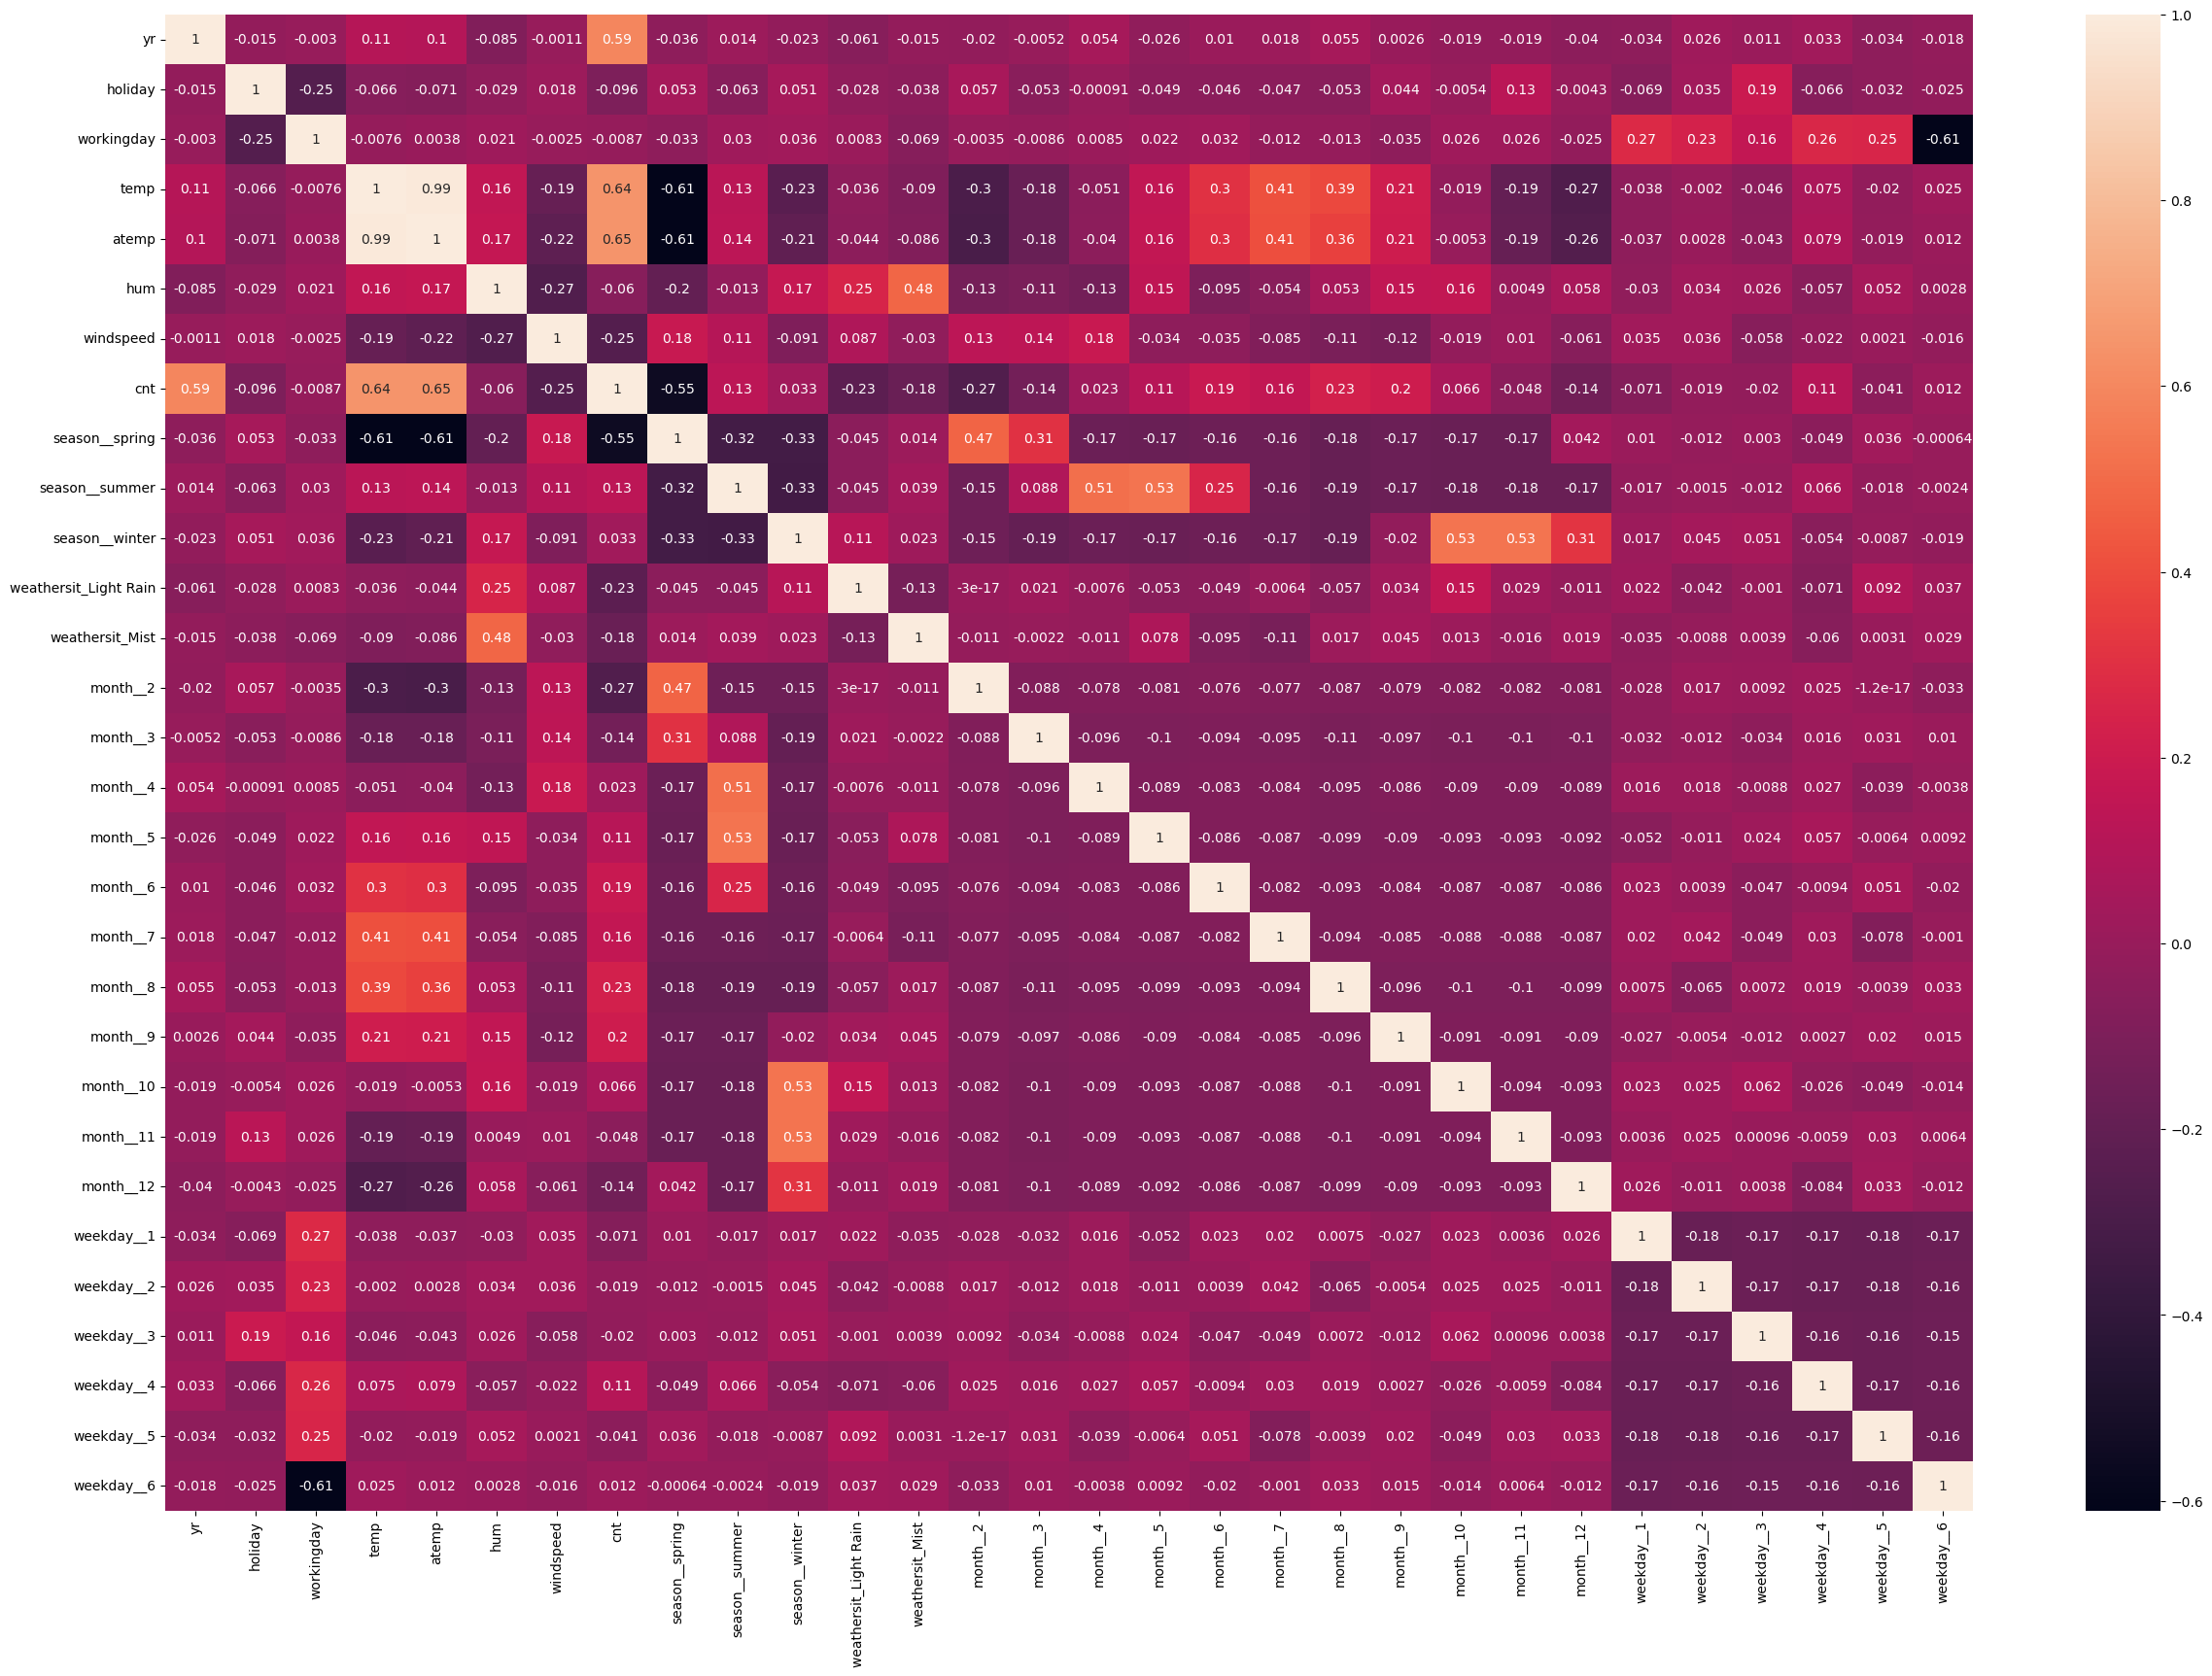

In [46]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

### cnt and temp


In [47]:
y_train= df_train.pop('cnt')
X_train= df_train

In [48]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [49]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season__spring,season__summer,season__winter,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season__spring', True, 1),
 ('season__summer', True, 1),
 ('season__winter', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1),
 ('month__2', False, 12),
 ('month__3', True, 1),
 ('month__4', False, 3),
 ('month__5', False, 2),
 ('month__6', False, 4),
 ('month__7', False, 13),
 ('month__8', True, 1),
 ('month__9', True, 1),
 ('month__10', True, 1),
 ('month__11', False, 14),
 ('month__12', False, 15),
 ('weekday__1', False, 10),
 ('weekday__2', False, 11),
 ('weekday__3', False, 9),
 ('weekday__4', False, 7),
 ('weekday__5', False, 8),
 ('weekday__6', False, 16)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season__spring',
       'season__summer', 'season__winter', 'weathersit_Light Rain',
       'weathersit_Mist', 'month__3', 'month__8', 'month__9', 'month__10'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month__2', 'month__4', 'month__5', 'month__6',
       'month__7', 'month__11', 'month__12', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lr=sm.OLS(y_train, X_train_rfe)
lr_model= lr.fit() 

In [69]:
lr_model.params

const                    0.268696
yr                       0.229702
holiday                 -0.090301
temp                     0.495171
hum                     -0.170179
windspeed               -0.185711
season__spring          -0.036642
season__summer           0.085070
season__winter           0.113720
weathersit_Light Rain   -0.246698
weathersit_Mist         -0.055934
month__3                 0.028540
month__8                 0.050642
month__9                 0.120374
month__10                0.042113
dtype: float64

In [70]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          9.02e-190
Time:                        18:00:17   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2687      0.035      7.622      0.000       0.199       0.338
yr                        0.2297      0.008     28.400      0.000       0.214       0.246
holiday                  -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp                      0.4952      0.034     14.582      0.000       0.428       0.562
hum                      -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed                -0.1857      0.026     -7.241      0.000      -0.236      -0.135
season__spring           -0.0366      0.023     -1.618      0.106      -0.081       0.008
season__summer            0.0851      0.016      5.202      0.000       0.053       0.117
season__winter            0.1137      0.020      5.675      0.000       0.074       0.153
weathersit_Light Rain    -0.2467      0.026     -9.338      0.000      -0.299      -0.195
weathersit_Mist          -0.0559      0.010     -5.342      0.000      -0.077      -0.035
month__3                  0.0285      0.014      1.975      0.049       0.000       0.057
month__8                  0.0506      0.017      2.897      0.004       0.016       0.085
month__9                  0.1204      0.017      6.966      0.000       0.086       0.154
month__10                 0.0421      0.017      2.414      0.016       0.008       0.076
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### season__spring having high P-value so will remove it

In [71]:
X_train_new = X_train_rfe.drop(["season__spring"], axis = 1)

In [72]:
X_train_sm= sm.add_constant(X_train_new)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.26e-190
Time:                        18:02:42   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2324      0.027      8.529      0.000       0.179       0.286
yr                        0.2286      0.008     28.318      0.000       0.213       0.244
holiday                  -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp                      0.5364      0.022     23.849      0.000       0.492       0.581
hum                      -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed                -0.1893      0.026     -7.396      0.000      -0.240      -0.139
season__summer            0.1049      0.011      9.643      0.000       0.083       0.126
season__winter            0.1393      0.012     11.321      0.000       0.115       0.164
weathersit_Light Rain    -0.2418      0.026     -9.199      0.000      -0.293      -0.190
weathersit_Mist          -0.0548      0.010     -5.233      0.000      -0.075      -0.034
month__3                  0.0238      0.014      1.681      0.093      -0.004       0.052
month__8                  0.0608      0.016      3.723      0.000       0.029       0.093
month__9                  0.1296      0.016      7.927      0.000       0.097       0.162
month__10                 0.0383      0.017      2.212      0.027       0.004       0.072
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### month__3 having high P-value so will remove it

In [79]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season__summer',
       'season__winter', 'weathersit_Light Rain', 'weathersit_Mist',
       'month__3', 'month__8', 'month__9', 'month__10'],
      dtype='object')

In [81]:
X_train_new = X_train_new.drop(["month__3"], axis = 1)

In [82]:
X_train_sm= sm.add_constant(X_train_new)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          6.02e-191
Time:                        18:05:06   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2390      0.027      8.848      0.000       0.186       0.292
yr                        0.2288      0.008     28.291      0.000       0.213       0.245
holiday                  -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp                      0.5308      0.022     23.821      0.000       0.487       0.575
hum                      -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed                -0.1868      0.026     -7.297      0.000      -0.237      -0.136
season__summer            0.1048      0.011      9.620      0.000       0.083       0.126
season__winter            0.1353      0.012     11.189      0.000       0.112       0.159
weathersit_Light Rain    -0.2401      0.026     -9.125      0.000      -0.292      -0.188
weathersit_Mist          -0.0546      0.010     -5.210      0.000      -0.075      -0.034
month__8                  0.0588      0.016      3.604      0.000       0.027       0.091
month__9                  0.1280      0.016      7.829      0.000       0.096       0.160
month__10                 0.0386      0.017      2.226      0.026       0.005       0.073
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### calculate VIF

In [84]:
vif= pd.DataFrame()
vif['Features']= X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values, i)
                          for i in range(len(X_train_new.columns))]
 
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
0,const,45.87
4,hum,1.87
7,season__winter,1.72
3,temp,1.59
9,weathersit_Mist,1.56
12,month__10,1.49
10,month__8,1.45
6,season__summer,1.38
8,weathersit_Light Rain,1.24
11,month__9,1.24


#### Now all are VIF are below 5 and all p value are below 0.05 so this model is the final one


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [85]:
y_train_pred= lr_model.predict(X_train_sm)
res = y_train-y_train_pred 

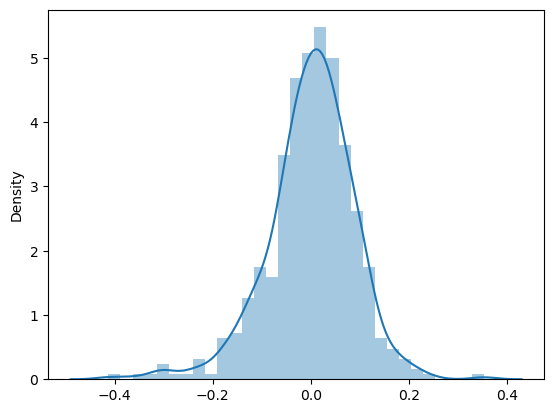

In [86]:
sns.distplot(res)
plt.show()   

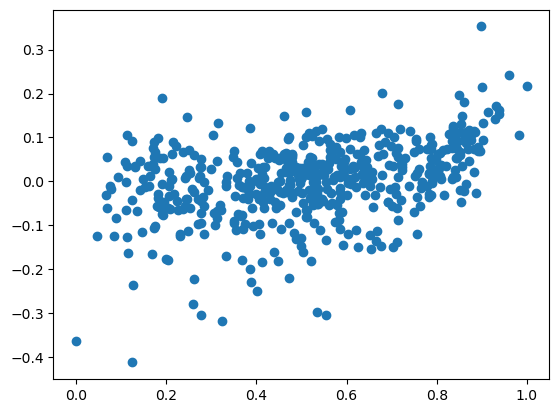

In [88]:
plt.scatter(y_train,res)
plt.show()

## Prediction and Test 

In [89]:
num_var=[   'temp', 'atemp', 'hum', 'windspeed' , 'cnt'] 
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season__spring,season__summer,...,month__9,month__10,month__11,month__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,0,0,1


In [90]:
y_test= df_test.pop('cnt')
X_test= df_test


In [91]:
print(X_test.shape) 

(219, 29)


In [93]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season__summer',
       'season__winter', 'weathersit_Light Rain', 'weathersit_Mist',
       'month__8', 'month__9', 'month__10'],
      dtype='object')

In [98]:

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season__summer',
       'season__winter', 'weathersit_Light Rain', 'weathersit_Mist',
       'month__8', 'month__9', 'month__10']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [101]:
X_test_new

,const,yr,holiday,temp,hum,windspeed,season__summer,season__winter,weathersit_Light Rain,weathersit_Mist,month__8,month__9,month__10
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,1,0,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,1,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,1,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0.708888,0.287411,0,0,0,1,0,0,0
702,1.0,1,0,0.519232,0.756118,0.283397,0,1,0,0,0,0,0
127,1.0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,0
640,1.0,1,0,0.745598,0.817947,0.052115,0,1,0,1,0,0,1


In [103]:
# Making predictions
y_test_pred = lr_model.predict(X_test_new)

## Model Evaluation

In [104]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8109746600297156

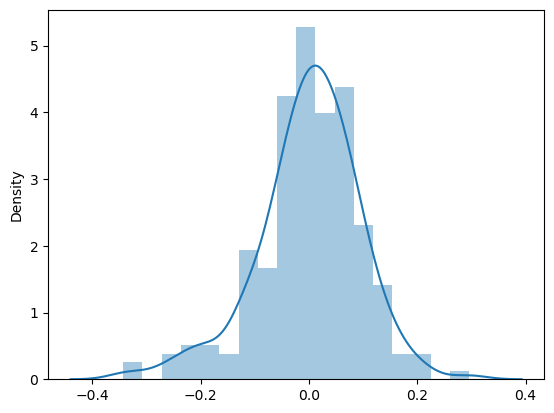

In [105]:
res_test= y_test- y_test_pred
sns.distplot(res_test)
plt.show()

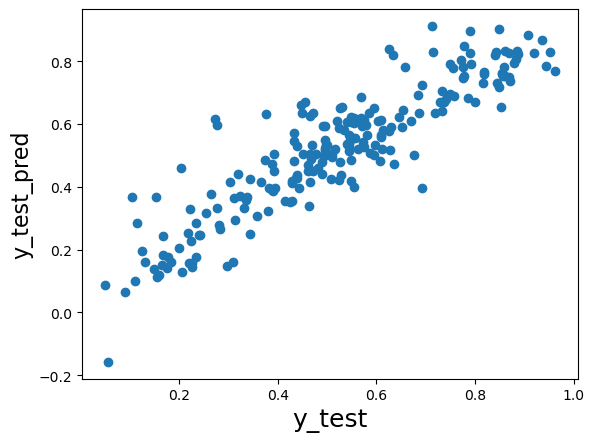

In [106]:
 
plt.scatter(y_test, y_test_pred) 
plt.xlabel('y_test', fontsize = 18)                    
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

### best fitted equation is-

- cnt=0.2390+(0.2288×yr)-(0.0945×holiday)+(0.5308×temp)−(0.1803×hum)+(0.1048×SeasonSummer)+(0.1353×SeasonWinter)-(0.2401×LightRain)−(0.0546×MistCloudy)+(0.05884×Sept)+(0.1280×Oct)+(0.0386×Nov)

 

#### These are the top 3 features which will significantly impact bike demand
 - 1-	Temp (temperature) having coefficient 0.5308 that means increase in unit in temperature bike demand will be 0.5308 multiply.
 - 2-	Yr (Year) having coefficient 0.2288 that means increase in unit in year bike demand will be 0.2288 multiply.
 - 3-	Winter Season- Winter Season having coefficient 0.1353 that means increase in unit in year bike demand will be 0.1353 multiply.
